# Implemente exemplos de Cálculo Vetorial e Tensorial usando PyTorch (e outras bibliotecas Python pertinentes), considerando:

### Derivadas parciais de funções escalares com até três variáveis, explorando polinômios e trigonométricas.


In [7]:
import torch

# Definir os tensores x e y
# É importante que requires_grad=True para que PyTorch rastreie as operações e calcule os gradientes
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(4.0, requires_grad=True)

# Definir a função f(x, y)
f = x**3 + 2 * x * y**2 + 5 * y * z**2 + torch.sin(z)

# Calcular as derivadas parciais
# Chama o método .backward() no tensor escalar 'f'.
# Isso calcula os gradientes de 'f' em relação a 'x', 'y' e 'z'.
# e os armazena nos atributos .grad de 'x', 'y' e 'z'.
f.backward()

# Acessar os gradientes
df_dx = x.grad
df_dy = y.grad
df_dz = z.grad

print(f"Função f(x, y) = x^3 + 2xy^2 + 5yz^2 + sin(z)")
print(f"Valor de f({x.item()}, {y.item()}, {z.item()}): {f.item()}")
print(f"df/dx em ({x.item()}, {y.item()}, {z.item()}): {df_dx.item()}")
print(f"df/dy em ({x.item()}, {y.item()}, {z.item()}): {df_dy.item()}")
print(f"df/dz em ({x.item()}, {y.item()}, {z.item()}): {df_dz.item()}")

Função f(x, y) = x^3 + 2xy^2 + 5yz^2 + sin(z)
Valor de f(2.0, 3.0, 4.0): 283.2431945800781
df/dx em (2.0, 3.0, 4.0): 30.0
df/dy em (2.0, 3.0, 4.0): 104.0
df/dz em (2.0, 3.0, 4.0): 119.34635925292969


### Operações de cálculo vetorial e matricial: produto escalar, produto vetorial, produto matriz-vetor, produto matriz-matriz, transposições, etc

In [16]:
import torch

# Matriz (2x3)
matrix = torch.tensor([[1.0, 4.0, 7.0],
                       [2.0, 5.0, 8.0]])

# Vetor (3x1, PyTorch entende a dimensão 1D como coluna se o contexto for de multiplicação)
vector = torch.tensor([3.0, 6.0, 9.0])

# Produto matriz-vetor usando torch.matmul()
mv_product_matmul = torch.matmul(matrix, vector)
print(f"Matriz:\n{matrix}")
print(f"Vetor:\n{vector}\n")
print(f"Produto Matriz-Vetor (matmul):\n{mv_product_matmul}")

Matriz:
tensor([[1., 4., 7.],
        [2., 5., 8.]])
Vetor:
tensor([3., 6., 9.])

Produto Matriz-Vetor (matmul):
tensor([ 90., 108.])


### Para campos escalares e vetoriais, onde aplicável, calcular: gradientes, divergentes, hessianas, jacobianos e rotacionais.

In [18]:
import torch

# --- Campo Escalar: f(x, y, z) = x^2 + 2yz ---
print("--- Gradiente de um Campo Escalar ---")

# Ponto no espaço onde queremos calcular o gradiente
# É crucial que requires_grad=True para que o autograd rastreie as operações
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)

# Definir o campo escalar
f = x**2 + 2 * y * z

# Calcular o gradiente
# Chama o método .backward() no tensor escalar 'f'.
# Isso calcula os gradientes de 'f' em relação a 'x', 'y' e 'z'
# e os armazena nos atributos .grad de 'x', 'y' e 'z'.
f.backward()

# Acessar os componentes do gradiente
grad_f_x = x.grad
grad_f_y = y.grad
grad_f_z = z.grad

print(f"Campo Escalar: f(x, y, z) = x^2 + 2yz")
print(f"Ponto (x, y, z): ({x.item()}, {y.item()}, {z.item()})")
print(f"Valor de f: {f.item()}")
print(f"Gradiente (df/dx, df/dy, df/dz): ({grad_f_x.item()}, {grad_f_y.item()}, {grad_f_z.item()})")

--- Gradiente de um Campo Escalar ---
Campo Escalar: f(x, y, z) = x^2 + 2yz
Ponto (x, y, z): (1.0, 2.0, 3.0)
Valor de f: 13.0
Gradiente (df/dx, df/dy, df/dz): (2.0, 6.0, 4.0)
Verificação Manual: (2, 6, 4)


### Use biblioteca gráficas (matplotlib, etc) para plotar campos escalares e vetoriais (1d, 2d, e 3d).

Campo escalar em 2D:

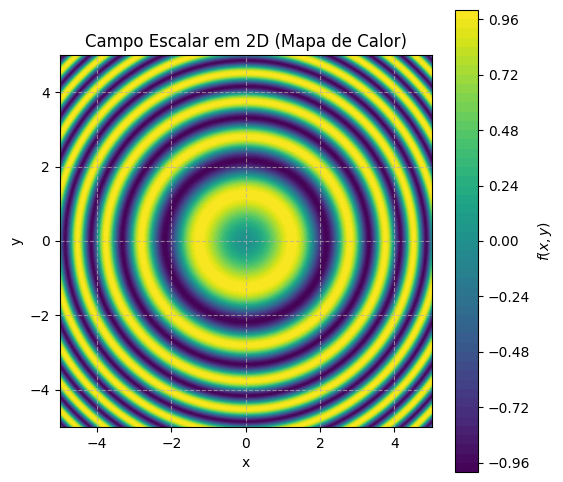

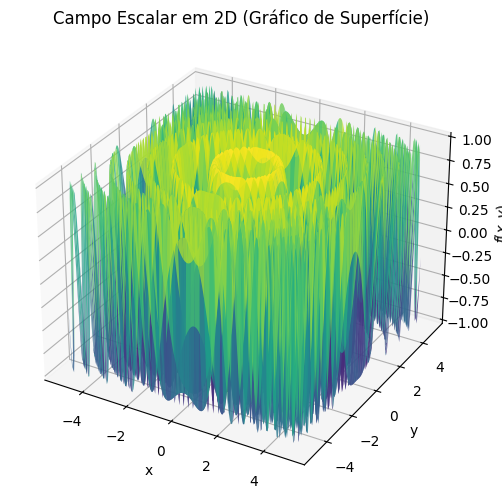

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necessário para gráficos 3D de superfície

# 1. Definir o campo escalar em 2D
def scalar_field_2d(coords):
    # Coords é um tensor de N x 2, onde N é o número de pontos
    x, y = coords[:, 0], coords[:, 1]
    return torch.sin(x**2 + y**2)

# 2. Gerar pontos de amostragem
# Criamos uma grade 200x200 de pontos no intervalo [-5, 5] para x e y
x_grid = np.linspace(-5, 5, 200)
y_grid = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_grid, y_grid)

# Para PyTorch, precisamos de um tensor de coordenadas (N, 2)
# onde N é o total de pontos na grade (200*200 = 40000)
coords_np = np.stack([X.ravel(), Y.ravel()], axis=1)
coords_torch = torch.from_numpy(coords_np).float()

# 3. Calcular valores do campo
Z_torch = scalar_field_2d(coords_torch)
# Redimensionamos o resultado para a forma da grade original para plotagem
Z_np = Z_torch.numpy().reshape(X.shape)

# 4. Plotar os resultados

# --- Mapa de Calor (Contourf Plot) ---
plt.figure(figsize=(6, 6))
# contourf cria um mapa de calor com linhas de contorno preenchidas
plt.contourf(X, Y, Z_np, levels=50, cmap='viridis')
plt.colorbar(label=r'$f(x, y)$')
plt.title('Campo Escalar em 2D (Mapa de Calor)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box') # Garante proporções corretas
plt.show()

# --- Gráfico de Superfície ---
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_np, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_title('Campo Escalar em 2D (Gráfico de Superfície)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$f(x, y)$')
plt.show()

Campo vetorial em 2D

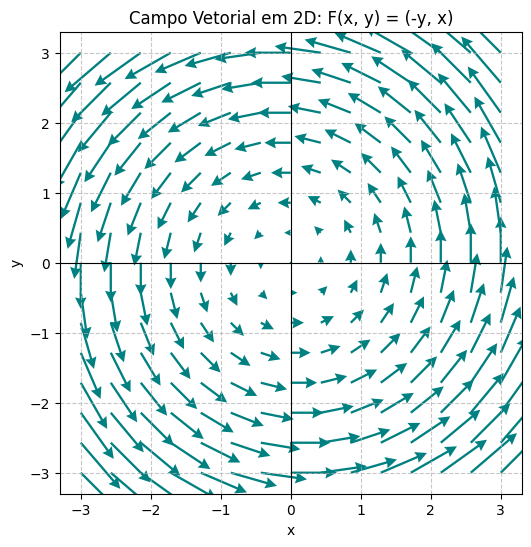

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir o campo vetorial em 2D
def vector_field_2d(coords):
    # Coords é um tensor de N x 2
    x, y = coords[:, 0], coords[:, 1]
    # Retorna as componentes do vetor (U, V)
    U = -y
    V = x
    return torch.stack([U, V], dim=1) # Empilha as componentes para formar vetores (N, 2)

# 2. Gerar pontos de amostragem
# Usamos uma grade mais esparsa para evitar sobrecarga visual de setas
x_grid = np.linspace(-3, 3, 15) # 15 pontos por dimensão
y_grid = np.linspace(-3, 3, 15)
X, Y = np.meshgrid(x_grid, y_grid)

# Para PyTorch, precisamos de um tensor de coordenadas (N, 2)
coords_np = np.stack([X.ravel(), Y.ravel()], axis=1)
coords_torch = torch.from_numpy(coords_np).float()

# 3. Calcular valores do campo
vectors_torch = vector_field_2d(coords_torch)
# Separamos as componentes X e Y dos vetores e redimensionamos para a forma da grade
U_np = vectors_torch[:, 0].numpy().reshape(X.shape)
V_np = vectors_torch[:, 1].numpy().reshape(Y.shape)

# 4. Plotar os resultados
plt.figure(figsize=(6, 6))
# plt.quiver(X, Y, U, V) plota setas nas posições (X,Y) com componentes (U,V)
# 'scale' ajusta o comprimento das setas (quanto menor, mais longas as setas)
plt.quiver(X, Y, U_np, V_np, color='teal', scale=30, width=0.005, headwidth=5)
plt.title('Campo Vetorial em 2D: F(x, y) = (-y, x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.gca().set_aspect('equal', adjustable='box') # Mantém a proporção dos eixos
plt.show()

### Buscar em livros de Mecânica dos Sólidos, Mecânica do Contínuo e/ou Teoria da Elasticidade exemplos considerando: campos de deslocamento (1d, 2d e 3d) e derivar tensor de deformação, tensor de material, tensor de tensões. Ver exemplos básicos nos capítulos 1, 2 e 3 em: https://github.com/cmpmech/deep-learning-in-computational-mechanics

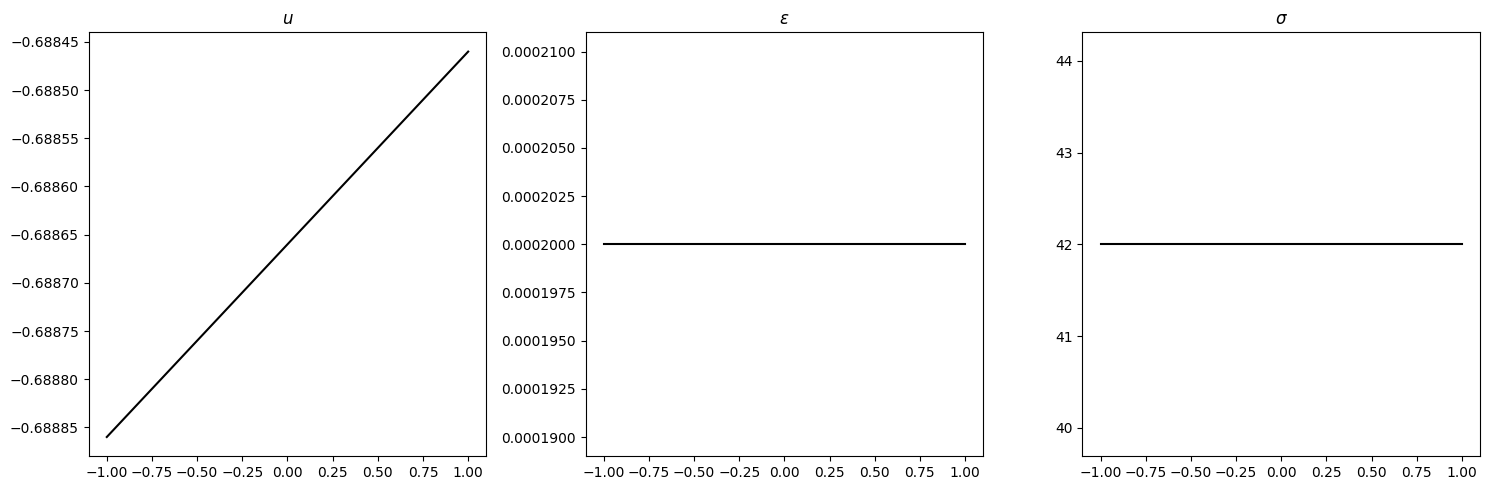

In [28]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

w = 200.0E-6
b = 1.0
model = torch.nn.Linear(1, 1)  # input dimension, output dimension

#overwrite random weights initially assigned
model.weight.data = torch.tensor([[w]])
model.weight.bias = torch.tensor([b])

nx = 5
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)

d = model(x)

dd_dx = grad(d, x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]

eps = dd_dx

E = 210000.0
sig = E * eps

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(x.detach(), d.detach(), "k")
ax[0].set_title("$u$")
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")
ax[2].plot(x.detach(), sig.detach(), "k")
ax[2].set_title("$\\sigma$")
fig.tight_layout()
plt.show()